## Übungszettel 6: Clustering und K-Nearest Neighbors

## Maschinelles Lernen - WiSe 20/21

### Abgabe 18.12.2020, 12 Uhr

Übungsaufgaben **müssen** in Gruppen von 3-4 Personen abgegeben werden. **Einzelabgaben werden nicht korrigiert bzw. bewertet**. Alle Lösungen sollen in _einem_ IPython Notebook realisiert werden, wobei Teilaufgaben und Zwischenergebnisse ausgegeben bzw. visualisiert werden sollen.
Das IPython Notebook und ggf. zugehörige Dateien müssen in ein Ziparchiv gepackt werden und in Ilias hochgeladen werden. Das Ziparchiv soll nach folgendem Muster benannt werden:
`UebungXX_Nachname1_Nachname2_Nachname3.zip`, wobei die Nachnamen in alphabetischer Reihenfolge angegeben werden und Umlaute ggf. ersetzt werden.

### Aufgabe 1: Dichte-basiertes Clustern (0,5+1+6,5+1 Punkte)

a) Beschreiben Sie kurz, wann dichte-basierte Clusteringverfahren eingesetzt werden und welche Vorteile und Nachteile es gibt.

weil k-means und hierarchisches Clustering Probleme haben Cluster zu
erkennen, die „S-förmig“ (Punkte die dicht-gepackt einen Pfad entlang
laufen) oder „Oval-geformt“ sind, wurde das dichte-basierte Clustering
eingeführt.

Die Grundidee besteht aus 2 Parametern ε und minPoints.
Innerhalb des Radius ε müssen sich minPoints Nachbarn zum aktuell
geprüften Punkt befinden, damit ein Punkt einem Cluster zugeordnet wird.
Jedem Punkt des Datensatz wird individuell geprüft, so dass Punkte in 3
Kategorien eingeteilt werden können.

1.) CorePoint: Der Punkt p besitzt n>=minPoints Nachbarn innerhalb von ε

2.) BorderPoint: Der Punkt p besitzt n<minPoints Nachbarn innerhalb von ε,
ist aber ein Nachbar von einem CorePoint p´.

3.) Ausreißer: Der Punkt p besitzt n<minPoints Nachbarn innerhalb von ε
und ist kein Nachbar von einem CorePoint p´.

Vorteile: Anzahl zu findender Cluster muss vorher nicht festgelegt werden
Komplexe und weitläufige Clusterstrukturen möglich

Nachteile: Ergebnis hängt stark von Parametern ε und minPoints ab
Punkte die als Ausreißer eingestuft wurden, können großen
Informationsgehalt besitzen.

b) Skizzieren Sie, was es bedeutet, wenn Punkte dichte-erreichbar sind und dichte-verbunden und erklären Sie kurz ihre Skizze. 

![Skizze](./example.png)

c) Implementieren Sie die Methoden `DBSCAN`, `expandCluster` und `regionQuery` in der Datei `DBSCAN.py` und wenden Sie dann die Methode `DBSCAN` auf die Punkte aus der Datei `clustering.csv` an. Wählen Sie passende Werte für `min_pts` und `eps`. Visualisieren Sie das Ergebnis.

d) Geben Sie die Laufzeiten für die Methoden aus Aufgabe c) in O-Notation an. Wie könnte die Implementierung von DBSCAN effizienter gemacht werden? Beschreiben Sie kurz das Vorgehen und geben Sie die Laufzeit für die effizientere Implementierung an (O-Notation).

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2

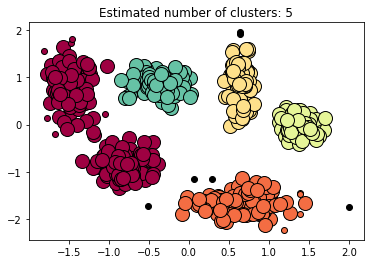

In [20]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
import pandas as pd

X = pd.read_csv("clustering.csv")
X = StandardScaler().fit_transform(X)
# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=5).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
print(labels)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()



### Aufgabe 2: K-Nearest Neighbors und fehlende Werte (3+2+1 Punkte)

Gegeben sei folgende Beispielmenge $V$ mit $$ v_i, v_j \in V $$:

| Day    |Outlook   | Temperature  |Humidity | Wind   | PlayTennis |
|--------|----------|--------------|---------|--------|------------|
| D1     | Sunny    | 26           | High    |        | No         |
| D2     | Sunny    | 28           | High    | Strong | No         |
| D3     | Overcast | 29           | High    | Weak   | Yes        |
| D4     | Rain     | 23           | High    | Weak   | Yes        |
| D5     | Rain     |              | Normal  | Weak   | Yes        |
| D6     | Rain     | 12           | Normal  | Strong | No         |
| D7     | Overcast | 8            |         | Strong | Yes        |
| D8     | Sunny    | 25           | High    | Weak   | No         |
| D9     | Sunny    | 18           | Normal  | Weak   | Yes        |
| D10    | Rain     | 20           | Normal  | Weak   | Yes        |
| D11    | Sunny    | 20           | Normal  | Strong |            |
| D12    | Overcast | 21           | High    | Strong | Yes        |
| D13    |          | 26           | Normal  | Weak   | Yes        |
| D14    | Rain     | 24           | High    | Strong | No         |
| D15    | Sunny    | 23           | Normal  | Weak   | No         |
| D16    | Sunny    | 21           | Normal  | Weak   | Yes        |

a) Um fehlende Werte zu behandeln, kann man diese einfach auffüllen, indem man die am naheliegendsten Nachbarn zu diesem Beispiel verwendet. Benutzen Sie hierfür 3-NN zum Ausfüllen dieser Werte.

* Normieren Sie das numerische Attribut wie folgt:
  $$ \hat{v}_i = \frac{v_i - \min v_j}{\max v_j - \min v_j}$$
  
* Überlegen Sie sich eine Distanzfunktion für das numerische Attribut

* Benutzen Sie für nominale Attribute die die 0/1-Distanz
  $$ d_A(v_1,v_2) = \begin{cases}
      0, & \text{if}\ v_1=v_2 \\
      1, & \text{if}\ v_1 \neq v_2
    \end{cases} 
  $$
  
* Benutzen Sie als Distanzfunktion für 3-NN die Manhattan-Distanz auf allen normierten Attributen
 
* Beziehen Sie für das Auffüllen von Werten die Klassifikation der Beispiele mit ein

* Überlegen Sie sich, wie sie beim Auffüllen mit fehlenden Attributen in den Nachbarn umgehen

* Benutzen Sie beim Berechnen der fehlenden Attribute stets nur die ursprüngliche Beispielmenge (also ohne möglicherweise vorher aufgefüllte Attribute)

Verwenden Sie die von Ihnen ausgefüllten Werte auch für die nächsten Aufgaben. 

In [2]:

 **********Normalized nummeric data (Temperature)**********

| Day    |Outlook   | Temperature    |Humidity | Wind   | PlayTennis |
|--------|----------|--------------  |---------|--------|------------|
| D1     | Sunny    | 0.86           | High    |        | No         |
| D2     | Sunny    | 0.95           | High    | Strong | No         |
| D3     | Overcast | 1              | High    | Weak   | Yes        |
| D4     | Rain     | 0.71           | High    | Weak   | Yes        |
| D5     | Rain     |                | Normal  | Weak   | Yes        |
| D6     | Rain     | 0.19           | Normal  | Strong | No         |
| D7     | Overcast | 0              |         | Strong | Yes        |
| D8     | Sunny    | 0.86           | High    | Weak   | No         |
| D9     | Sunny    | 0.48           | Normal  | Weak   | Yes        |
| D10    | Rain     | 0.57           | Normal  | Weak   | Yes        |
| D11    | Sunny    | 0.57           | Normal  | Strong |            |
| D12    | Overcast | 0.62           | High    | Strong | Yes        |
| D13    |          | 0.86           | Normal  | Weak   | Yes        |
| D14    | Rain     | 0.76           | High    | Strong | No         |
| D15    | Sunny    | 0.71           | Normal  | Weak   | No         |
| D16    | Sunny    | 0.62           | Normal  | Weak   | Yes        |


#define a function to calculate distance for nummeric attribute

define dis_func(n):
    #first scale inputed data
    m = (n-8)/21
    #calculate distance with other points
    for i in Temperature[]:
        dist[i] = math.sqrt((m-Temperature[i])**)

#define a function to calculate distance for nominal attribute
def levenshteinDistanceDP(token1, token2):
    distances = numpy.zeros((len(token1) + 1, len(token2) + 1))

    for t1 in range(len(token1) + 1):
        distances[t1][0] = t1

    for t2 in range(len(token2) + 1):
        distances[0][t2] = t2
        
    a = 0
    b = 0
    c = 0
    
    for t1 in range(1, len(token1) + 1):
        for t2 in range(1, len(token2) + 1):
            if (token1[t1-1] == token2[t2-1]):
                distances[t1][t2] = distances[t1 - 1][t2 - 1]
            else:
                a = distances[t1][t2 - 1]
                b = distances[t1 - 1][t2]
                c = distances[t1 - 1][t2 - 1]
                
                if (a <= b and a <= c):
                    distances[t1][t2] = a + 1
                elif (b <= a and b <= c):
                    distances[t1][t2] = b + 1
                else:
                    distances[t1][t2] = c + 1

    printDistances(distances, len(token1), len(token2))
    return distances[len(token1)][len(token2)]

#manhattan distance funktion
def manhattan(xA,yA,xB,yB):
  distance = abs(xA-xB) + abs(yA-yB)
  return distance

#KNN

import operator 
def getKNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        #using manhattan
        dist = manhattan()
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

SyntaxError: invalid syntax (<ipython-input-2-8564e97f6ce7>, line 1)

b) Benutzen Sie für die Berechnung von k-NN die gleichen Eckdaten wie in der vorherigen Aufgabe (Normierung für numerische Attribute, 0/1-Distanz für nominale Attribute und die Manhattan Distanz). Klassifizieren Sie so mit 1-NN das folgende Beispiel:

* D17: Outlook=Sunny, Temperature=23, Humidity=High, Wind=Strong

0 1 2 3 4 5 
1 1 2 3 4 5 
2 2 1 2 3 4 
3 3 2 1 2 3 
4 4 3 2 2 3 


c) Testen Sie nun verschiedene k. Für welches k ändert sich die Klassifikation gegenüber k = 1?